## Separando do todo

* Sperar o lote
* Gerar altura em relação ao solo
* Agrupar por Clusters (DBSCAN)
* Calcular Normal

In [1]:
import pdal
import json
import numpy as np

In [2]:
bounds = ([333060, 333090], [7396500, 7396530])
# Polygon ((332426.68348924710880965 7390661.41352917719632387, 332431.68747117172461003 7390648.28714181017130613, 332468.38333861867431551 7390662.7914372431114316, 332463.59692112560151145 7390675.91782461106777191, 332426.68348924710880965 7390661.41352917719632387))

In [3]:
ept = [
    {
      "type": "readers.ept",
      "filename": "https://ept-m3dc-pmsp.s3-sa-east-1.amazonaws.com/ept.json",
      "bounds": str(bounds)
    },
    {   
        "type":"filters.hag_delaunay"
#     },
#     {   "type":"filters.eigenvalues",
#         "knn":16
    },
    {   "type":"filters.normal",
        "knn":30
    },
    {
        "type":"filters.dbscan",
        "min_points":10,
        "eps":2.0,
        "dimensions":"X,Y,Z"
    },
#     {
#         "type":"filters.cluster"
#     },
    {
        "type":"writers.las",
        "compression":"laszip",
        "filename":"results/coreto-luz.laz"
    }
]

pipeline = pdal.Pipeline(json.dumps(ept))
pipeline.validate()
%time n_points = pipeline.execute()
print(f'Pipeline selected {n_points} points')

CPU times: user 1.75 s, sys: 107 ms, total: 1.86 s
Wall time: 2.15 s
Pipeline selected 13496 points


In [4]:
pipeline.schema

{'schema': {'dimensions': [{'name': 'Blue', 'size': 2, 'type': 'unsigned'},
   {'name': 'Classification', 'size': 1, 'type': 'unsigned'},
   {'name': 'EdgeOfFlightLine', 'size': 1, 'type': 'unsigned'},
   {'name': 'GpsTime', 'size': 8, 'type': 'floating'},
   {'name': 'Green', 'size': 2, 'type': 'unsigned'},
   {'name': 'Intensity', 'size': 2, 'type': 'unsigned'},
   {'name': 'NumberOfReturns', 'size': 1, 'type': 'unsigned'},
   {'name': 'OriginId', 'size': 4, 'type': 'unsigned'},
   {'name': 'PointSourceId', 'size': 2, 'type': 'unsigned'},
   {'name': 'Red', 'size': 2, 'type': 'unsigned'},
   {'name': 'ReturnNumber', 'size': 1, 'type': 'unsigned'},
   {'name': 'ScanAngleRank', 'size': 4, 'type': 'floating'},
   {'name': 'ScanDirectionFlag', 'size': 1, 'type': 'unsigned'},
   {'name': 'UserData', 'size': 1, 'type': 'unsigned'},
   {'name': 'X', 'size': 8, 'type': 'floating'},
   {'name': 'Y', 'size': 8, 'type': 'floating'},
   {'name': 'Z', 'size': 8, 'type': 'floating'},
   {'name': '

In [5]:
import pandas as pd
arr = pipeline.arrays[0]
df = pd.DataFrame(arr)
# print(df.head().to_latex(index=False))
df.head()

,Blue,Classification,EdgeOfFlightLine,GpsTime,Green,Intensity,NumberOfReturns,OriginId,PointSourceId,Red,...,UserData,X,Y,Z,HeightAboveGround,NormalX,NormalY,NormalZ,Curvature,ClusterID
0,16896,5,0,358025.631887,23552,30,1,2416,6,17920,...,15,333084.40,7396519.07,752.30,14.927621,-0.438987,0.478013,0.760785,0.069766,0
1,15360,5,0,358025.668248,21504,14,2,2416,6,16384,...,9,333082.83,7396519.22,746.82,9.487211,-0.179108,-0.902095,0.392612,0.190336,-1
2,24064,5,0,358025.722634,28416,23,1,2416,6,24064,...,16,333080.26,7396526.45,752.99,15.890000,-0.248443,0.825297,0.507110,0.032076,0
3,38400,6,0,358025.831829,45568,50,1,2416,6,57088,...,7,333074.59,7396519.17,744.85,7.080000,-0.249948,0.235587,0.939162,0.017181,1
4,22272,6,0,358025.831973,26624,38,1,2416,6,41728,...,8,333074.02,7396510.44,745.28,7.550000,0.168122,-0.244581,0.954943,0.019062,1


In [6]:
# Reduzindo valores a mínimos para poderem ser visualizados
df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']] - df[['X', 'Y', 'Z']].min()

In [7]:
df.Classification.unique()

array([ 5,  6, 20, 19,  2], dtype=uint8)

In [8]:
## Separando apenas Buildings
bd = df[df.Classification.isin([6])].reset_index()

In [9]:
bd

,index,Blue,Classification,EdgeOfFlightLine,GpsTime,Green,Intensity,NumberOfReturns,OriginId,PointSourceId,...,UserData,X,Y,Z,HeightAboveGround,NormalX,NormalY,NormalZ,Curvature,ClusterID
0,3,38400,6,0,358025.831829,45568,50,1,2416,6,...,7,14.59,19.16,8.14,7.080000,-0.249948,0.235587,0.939162,0.017181,1
1,4,22272,6,0,358025.831973,26624,38,1,2416,6,...,8,14.02,10.43,8.57,7.550000,0.168122,-0.244581,0.954943,0.019062,1
2,6,28160,6,0,358025.977241,22016,28,1,2416,6,...,7,7.48,18.17,7.73,6.904500,0.009669,0.195674,0.980621,0.016311,1
3,10,15872,6,0,358350.361079,10496,20,1,2416,6,...,6,6.28,10.81,7.22,6.450000,-0.273076,-0.216806,0.937243,0.013676,1
4,12,15616,6,0,358350.506371,10240,13,1,2416,6,...,6,14.29,4.35,7.03,6.144224,0.196875,-0.203835,0.959006,0.013235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,13380,50944,6,0,358025.941176,45056,10,2,2416,6,...,3,8.29,1.90,3.72,2.970927,0.010766,0.144222,0.989487,0.009424,10
2144,13381,40960,6,0,358025.977521,45568,48,1,2416,6,...,3,6.55,1.97,3.80,3.095591,-0.095755,0.112062,0.989077,0.013333,10
2145,13409,45568,6,0,358350.288205,50176,57,1,2416,6,...,3,6.37,0.54,3.78,3.160000,-0.189538,0.157889,0.969096,0.012453,10
2146,13414,45056,6,0,358350.342734,48640,67,1,2416,6,...,3,8.42,0.74,3.87,3.080000,0.020241,0.240851,0.970351,0.016951,10


In [10]:
bd.ClusterID.unique()

array([ 1, -1, 10])

In [11]:
color_choices = np.random.rand(bd.ClusterID.max()+1, 3)

In [12]:
colors = list(map(lambda x: color_choices[x], bd.ClusterID))

In [14]:
import ipyvolume as p3 

fig = p3.figure(width=1000)
fig.xlabel='Y'
fig.ylabel='Z'
fig.zlabel='X'
all_points = p3.scatter(bd['Y'], bd['Z'], bd['X'], color=colors, size=1)
# all_points = p3.scatter(bd['Y'], bd['Z'], bd['X'], color=list(map(lambda x: [x,x,x], bd.Curvature)), size=1, marker='square_2d')

p3.squarelim()

p3.show()

## Gerando o polígono de cada Cluster

Utilizando o Alpha Shape https://gist.github.com/dwyerk/10561690

In [15]:
import shapely.geometry as geometry
from scipy.spatial import Delaunay

In [16]:
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import Delaunay
import numpy as np
import math

def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set
    of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the
        gooeyness of the border. Smaller numbers
        don't fall inward as much as larger numbers.
        Too large, and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull

    coords = np.array([point.coords[0] for point in points])
    tri = Delaunay(coords)
    triangles = coords[tri.vertices]
    a = ((triangles[:,0,0] - triangles[:,1,0]) ** 2 + (triangles[:,0,1] - triangles[:,1,1]) ** 2) ** 0.5
    b = ((triangles[:,1,0] - triangles[:,2,0]) ** 2 + (triangles[:,1,1] - triangles[:,2,1]) ** 2) ** 0.5
    c = ((triangles[:,2,0] - triangles[:,0,0]) ** 2 + (triangles[:,2,1] - triangles[:,0,1]) ** 2) ** 0.5
    s = ( a + b + c ) / 2.0
    areas = (s*(s-a)*(s-b)*(s-c)) ** 0.5
    circums = a * b * c / (4.0 * areas)
    filtered = triangles[circums < (1.0 / alpha)]
    edge1 = filtered[:,(0,1)]
    edge2 = filtered[:,(1,2)]
    edge3 = filtered[:,(2,0)]
    edge_points = np.unique(np.concatenate((edge1,edge2,edge3)), axis = 0).tolist()
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points

In [17]:
points = bd[bd.ClusterID == bd.ClusterID.unique()[0]][['X', 'Y']].to_numpy()

In [18]:
poligono = alpha_shape(geometry.MultiPoint(points), 0.5)

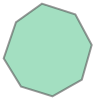

In [19]:
poligono[0].simplify(0.75)

## Agrupando as faces

In [20]:
from sklearn.cluster import DBSCAN, OPTICS, SpectralClustering, estimate_bandwidth, MeanShift
from sklearn import preprocessing

ModuleNotFoundError: No module named 'sklearn'

In [21]:
X = bd[bd.ClusterID == bd.ClusterID.unique()[0]][['NormalX', 'NormalY', 'NormalZ']]

<AxesSubplot:xlabel='NormalX', ylabel='NormalY'>

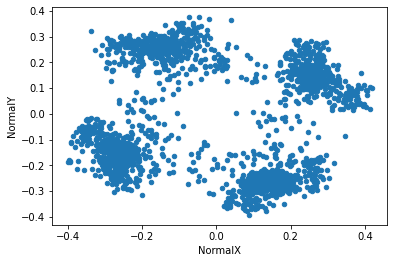

In [22]:
X.plot.scatter(x='NormalX', y='NormalY')

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

NameError: name 'preprocessing' is not defined

In [24]:
estimate_bandwidth(X)

NameError: name 'estimate_bandwidth' is not defined

In [168]:
# clustering = DBSCAN(eps=0.05, min_samples=6).fit(X)
# clustering = SpectralClustering().fit(X)
clustering = MeanShift(bandwidth=0.3, cluster_all=False).fit(X)

In [169]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3])

In [170]:
clustering.labels_ 

array([2, 1, 2, ..., 2, 2, 2])

In [171]:
colors = np.random.rand(len(np.unique(clustering.labels_)), 3)
colors

array([[8.81520170e-01, 8.95640580e-01, 6.68248161e-01],
       [4.55054477e-01, 1.45013442e-01, 2.51331922e-01],
       [1.87910196e-01, 5.58995343e-01, 4.86271635e-02],
       [6.61492367e-01, 1.67854033e-04, 9.82888383e-01],
       [1.99479272e-02, 5.11510990e-01, 5.07241413e-01]])

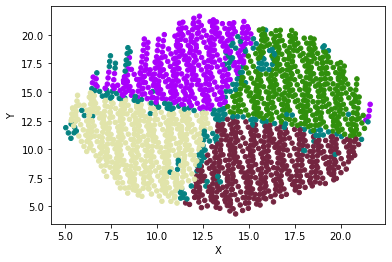

In [172]:
bd[bd.ClusterID == bd.ClusterID.unique()[0]].plot.scatter(x='X', y='Y', c=colors[clustering.labels_])

In [295]:
import open3d as o3d

In [296]:
bd[['X', 'Y', 'Z']].to_numpy()

array([[20.2 , 17.27,  6.96],
       [16.56,  8.33,  7.56],
       [16.54, 17.53,  7.78],
       ...,
       [21.16, 12.3 ,  7.64],
       [21.38, 12.56,  7.28],
       [20.11, 16.58,  7.1 ]])

In [297]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(bd[['X', 'Y', 'Z']].to_numpy())

In [298]:
pcd.normals = o3d.utility.Vector3dVector((bd[['NormalX', 'NormalY', 'NormalZ']].to_numpy()))

In [299]:
pcd

geometry::PointCloud with 2148 points.

In [300]:
o3d.visualization.draw_geometries([pcd])

In [ ]:
o3d.visualization.draw_geometries([pcd], point_show_normal=True)

In [302]:
plane_model, inliers = pcd.segment_plane(distance_threshold=0.50,
                                         ransac_n=8,
                                         num_iterations=1000)

In [303]:
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

Plane equation: 0.01x + -0.02y + 1.00z + -7.66 = 0


In [304]:
inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([outlier_cloud])

In [149]:
plane_model

array([ 0.02802781,  0.01395864,  0.99950968, -8.44516883])

In [101]:
import trimesh

In [107]:
# test on a sphere primitive
mesh = trimesh.creation.icosphere()

In [102]:
tri_points = trimesh.PointCloud(bd[['X', 'Y', 'Z']].to_numpy())

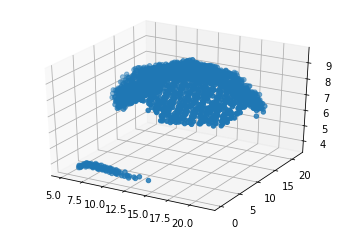

In [103]:
trimesh.points.plot_points(bd[['X', 'Y', 'Z']].to_numpy(), show=True)

In [119]:
# create a visualization scene with rays, hits, and mesh
tri_points.scene()

<trimesh.Scene(len(geometry)=1)>

In [116]:
tri_points


<trimesh.PointCloud(vertices.shape=(2148, 3))>

In [49]:

# estimate radius for rolling ball
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist   

mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
           pcd,
           o3d.utility.DoubleVector([radius, radius * 4]))

In [50]:
o3d.visualization.draw_geometries([mesh])

In [54]:
mesh2 = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd)

In [48]:
# create the triangular mesh with the vertices and faces from open3d
tri_mesh = trimesh.Trimesh(np.asarray(mesh.vertices), np.asarray(mesh.triangles),
                          vertex_normals=np.asarray(mesh.vertex_normals))

trimesh.convex.is_convex(tri_mesh)

False

In [64]:
tri_mesh.volume

141.7112839975847

In [16]:
roof_quiver = p3.quiver(bd['Y'], bd['Z'], bd['X'], bd['NormalY'], bd['NormalZ'], bd['NormalX'], color='orange', size=5)
fig.scatters.append(roof_quiver)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc048c9fbd0>,
      dtype=object)

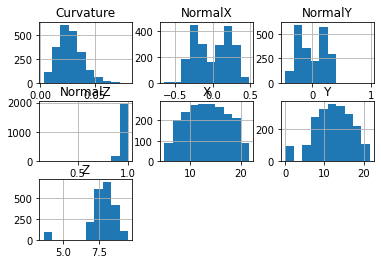

In [15]:
bd[['X', 'Y','Z', 'NormalX', 'NormalY', 'NormalZ', 'Curvature']].hist()

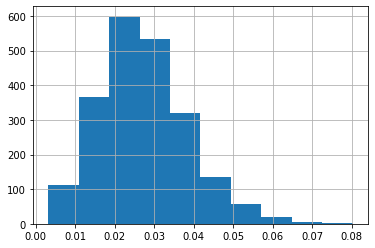

In [16]:
bd.Curvature.hist()

In [18]:
roof_model = p3.plot_trisurf(bd['Y'], bd['Z'], bd['X'], tri.simplices, color='red')
fig.meshes.append(roof_model)
roof_quiver.visible = False